# Created by - Siddhesh Malusare

# Objectives

***Our aim is to study users session data and identify features which play an important role to predict whether the user of an e-commerce website will generate revenue for our client.***

***Steps***
- We will perform EDA to predict relation between visitors data and Revenue generation.
- We will do data cleaning and preprocessing wherever required.
- We will build models and predict whether a person will purchase an item based on given features.
- We will check which features played most important role in the prediction.
- We will also check why these particular features are important for prediction.

# Dataset information

***Administrative*** column shows the number of administrative pages that a user has visited. For an e-commerce website, these pages can include the ***Dashboard, Products, Categories, Orders, and Settings pages.***

***Administrative_Duration*** column gives the amount of time spent on such Administrative pages.

***Informational*** column shows the number of informational pages that a user has visited. For an e-commerce website, these pages can include the ***About Us, Contact Us, Shipping & Returns, Privacy Policy, and Terms of Service pages.***

***Informational_Duration*** column gives the amount of time spent on such Informational pages.

***Product-Related*** column shows the number of product-related pages that a user has visited. For an e-commerce website, these pages can include the ***product details page, the product reviews page, and the product comparison page.***

***Bounce rate*** is a metric that measures the percentage of website visitors who leave a webpage or website without interacting with any other pages or elements on the site. 

***Exit rate*** is a metric that measures the percentage of visitors who exit a website from a specific page. 

Both high bounce and exit rate indicate that users are not finding what they are looking for, or that they are not satisfied with the content on the website wrt User Interface.

Both low bounce and exit rate can indicate that Users are finding what they are looking for,user-friendly website design and no technical problems with the website

***Page Value*** represents the average monetary value of the pages visited by the visitor. This means that, on average, each visitor who visits these pages will spend this amount of money.

***SpecialDay*** represents the closeness of the browsing date to special days or holidays.

# Import Packages

In [359]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%2f' %x)
pd.options.display.max_columns = None
from matplotlib.pyplot import figure

from datetime import datetime as dt

# Import Data

In [2]:
data = pd.read_csv('D:\Siddhesh\Data Science - D\Projects\Online Shoppper Conversion\online_shoppers_intention (1).csv')

# Data Exploration

In [3]:
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False


We have total 12330 visitors information with 18 recorded features per visitor.

In [4]:
data_copy = data.copy()

In [5]:
#reading dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.000000,2.315166,3.321784,0.000000,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.000000,80.818611,176.779107,0.000000,0.000000,7.500000,93.256250,3398.750000
Informational,12330.000000,0.503569,1.270156,0.000000,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.000000,34.472398,140.749294,0.000000,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.000000,31.731468,44.475503,0.000000,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.000000,1194.746220,1913.669288,0.000000,184.137500,598.936905,1464.157214,63973.522230
BounceRates in %,12330.000000,0.022191,0.048488,0.000000,0.000000,0.003112,0.016813,0.200000
ExitRates in %,12330.000000,0.043073,0.048597,0.000000,0.014286,0.025156,0.050000,0.200000
PageValues,12330.000000,5.889258,18.568437,0.000000,0.000000,0.000000,0.000000,361.763742
SpecialDay (probability),12330.000000,0.061427,0.198917,0.000000,0.000000,0.000000,0.000000,1.000000


Features like Operating System, Browser, Region and Teaffic Type are Categorical data shrouded as Numerical Type. We need to convert it to Categorical.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

# Data Cleaning

In [8]:
# we will convert datatype of Revenue from boolean. So we can check correlation of it wrt to other variables
data['Revenue'] = data['Revenue'].map({True:1,False:0})

In [9]:
data[['OperatingSystems','Browser','Region','TrafficType','Weekend']] = data[['OperatingSystems','Browser','Region','TrafficType','Weekend']].astype(object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  object 
 12  Browser                   12330 non-null  object 
 13  Region                    12330 non-null  object 
 14  Traffi

#### Missing Value Check

In [11]:
# missing value
miss_val = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
miss_val

Administrative             0.000000
Administrative_Duration    0.000000
Weekend                    0.000000
VisitorType                0.000000
TrafficType                0.000000
Region                     0.000000
Browser                    0.000000
OperatingSystems           0.000000
Month                      0.000000
SpecialDay (probability)   0.000000
PageValues                 0.000000
ExitRates in %             0.000000
BounceRates in %           0.000000
ProductRelated_Duration    0.000000
ProductRelated             0.000000
Informational_Duration     0.000000
Informational              0.000000
Revenue                    0.000000
dtype: float64

No missing values in dataset.

#### Zero Variance Check

In [12]:
data.nunique()[data.nunique()==1]

Series([], dtype: int64)

In [13]:
# Extracting categorical and numerical columns
col_cate = [col for col in data.columns if data[col].dtype == 'object']
col_num = [col for col in data.columns if data[col].dtype != 'object']

In [14]:
print( f'There are {len(col_cate)} number of Categorical columns:\n',col_cate)
print('----'*15)
print(f'There are {len(col_num)} number of Numerical columns:\n',col_num)

There are 7 number of Categorical columns:
 ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
------------------------------------------------------------
There are 11 number of Numerical columns:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues', 'SpecialDay (probability)', 'Revenue']


In [15]:
# unique features in categorical columns
for i in col_cate:
    print(f'There are {data[i].nunique()} number of values in feature {i}:\n',data[i].unique())
    print('----'*20)

There are 10 number of values in feature Month:
 ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
--------------------------------------------------------------------------------
There are 8 number of values in feature OperatingSystems:
 [1 2 4 3 7 6 8 5]
--------------------------------------------------------------------------------
There are 13 number of values in feature Browser:
 [1 2 3 4 5 6 7 10 8 9 12 13 11]
--------------------------------------------------------------------------------
There are 9 number of values in feature Region:
 [1 9 2 3 4 5 6 7 8]
--------------------------------------------------------------------------------
There are 20 number of values in feature TrafficType:
 [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20]
--------------------------------------------------------------------------------
There are 3 number of values in feature VisitorType:
 ['Returning_Visitor' 'New_Visitor' 'Other']
------------------------------------------------

***Notes:***
We donot have data for complete year, only for 10 months data is available. Month of Jan and April are missing. 

# Exploratory Data Analysis

In [16]:
import matplotlib.style as style
sns.set_palette(["lightcoral"])

In [18]:
style.use('seaborn-darkgrid')

####  Lets check each categorical feature one by one first. Then we will move towards Numerical features.

## Categorical Features Analysis

### Impact of Weekend on Revenue Analysis

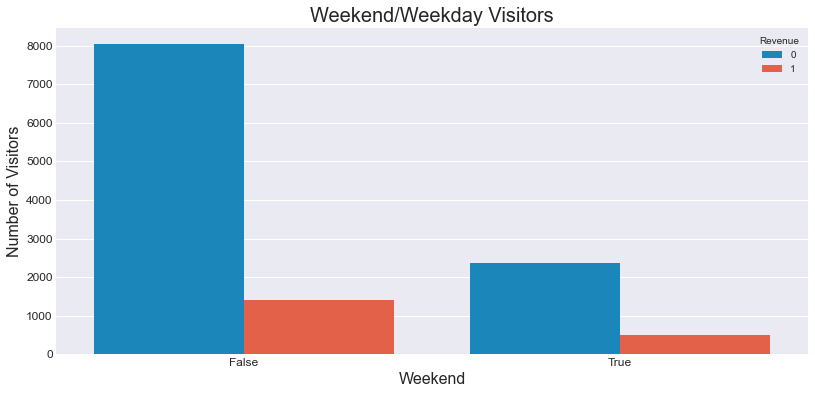

In [414]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x= 'Weekend',hue='Revenue')
plt.ylabel('Number of Visitors',fontsize=16)
plt.xlabel('Weekend',fontsize=16)
plt.title('Weekend/Weekday Visitors',fontsize = 20)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.show()

This wont really give us the true picture. Since Weekends consist of two days and weekdays of 5. We will need to check the visitor rate relative to number of days.

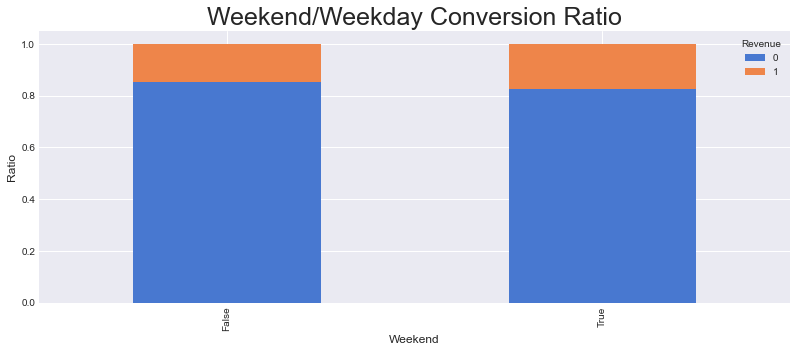

In [402]:
colors = sns.color_palette('muted', len(data.VisitorType.unique()))
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(axis=1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = colors)
plt.title('Weekend/Weekday Conversion Ratio', fontsize = 25)
plt.ylabel('Ratio')
plt.show()

In [23]:
print('Percent of people who got converted on a Weekend',round(len(data[(data['Weekend'] == True) & (data['Revenue'] == 1)])/len(data[(data['Weekend'] == True) & (data['Revenue'] == 0)]),2)*100,'%')

Percent of people who got converted on a Weekend 21.0 %


In [24]:
print('Percent of people who got converted on a Weekday',round(len(data[(data['Weekend'] == False) & (data['Revenue'] == 1)])/len(data[(data['Weekend'] == False) & (data['Revenue'] == 0)]),3)*100,'%')

Percent of people who got converted on a Weekday 17.5 %


***Observation:***
- It is clear that Visitors who visit website on a ***weekend have 3.5% more chance*** of of buying compared to those who visit on a weekday.

***Reasons***
- Weekends have a higher chance of conversion as users have more leisure time, are relaxed, and may be actively looking to make purchases or engage with products.
- But this is not that good. Since more users are visiting during weekdays client should capitalize on this oppurtunity.

Though this is a general industry trend client can take some steps to stand out from the competition and capture the attention of potential customers.

***Suggestions:***
- ***Weekday-specific promotions***: Offer exclusive discounts, special offers, or incentives specifically for weekdays. This can motivate users to choose your product or service over competitors, knowing they can take advantage of weekday-specific deals.
- Use of ***Scarcity marketing*** techniques:

    - ***Flash sales or daily deals***: Run time-limited sales or daily deals where specific products are offered at discounted prices for a limited duration during the day. The time slot allocation will also important role in conversion. Use a countdown timer to display the remaining time for each deal. Customers are more likely to make a purchase when they see that they have a limited window of opportunity.

    - ***Limited-time offers***: Setting a specific time limit for a discount or promotion on a product. Display a countdown timer indicating the remaining time until the offer expires. This creates a sense of urgency and encourages users to make a purchase before the opportunity is gone.

    - ***Limited stock notifications***: Show a countdown timer indicating the time until a product is no longer available or until stock runs out. Alongside the timer, display notifications such as "Only X items left" or "Limited stock available." This conveys a sense of scarcity, prompting customers to act quickly to secure the product before it's gone.

In [418]:
len(data[data['Weekend'] == False]) / len(data)

0.767396593673966

In [20]:
def countplot(var):
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x= var,hue='Revenue')
    plt.ylabel('Number of Visitors')
    plt.show()

In [25]:
import datetime

# Define the start and end dates for the year
start_date = datetime.date(year=2017, month=1, day=1)
end_date = datetime.date(year=2017, month=12, day=31)

# Initialize counters
weekend_count = 0
weekday_count = 0

# Iterate through each day in the year
current_date = start_date
while current_date <= end_date:
    # Exclude the months of January and April
    if current_date.month != 1 and current_date.month != 4:
        # Count weekends (Saturday and Sunday)
        if current_date.weekday() >= 5:
            weekend_count += 1
        # Count weekdays (Monday to Friday)
        else:
            weekday_count += 1
    # Increment the current date by one day
    current_date += datetime.timedelta(days=1)

# Print the count of weekends and weekdays
print("Number of weekends:", weekend_count)
print("Number of weekdays:", weekday_count)


Number of weekends: 86
Number of weekdays: 218


In [26]:
(len(data[(data['Weekend'] == True) & (data['Revenue'] == 1)]))/86

5.8023255813953485

Approximately 6 visitors generated revenue per day on a weekend.

In [27]:
(len(data[(data['Weekend'] == False) & (data['Revenue'] == 1)]))/218

6.463302752293578

On average 6.5 visitors generated revenue per day on a weekday.

In [28]:
(len(data[(data['Weekend'] == True) & (data['Revenue'] == 0)]))/86

27.546511627906977

On average 27.5 visitors did not generated any revenue per weekend.

In [29]:
(len(data[(data['Weekend'] == False) & (data['Revenue'] == 0)]))/86

93.63953488372093

On average 93.5 visitors did not generated any revenue per weekday.

### Type of Visitors Analysis

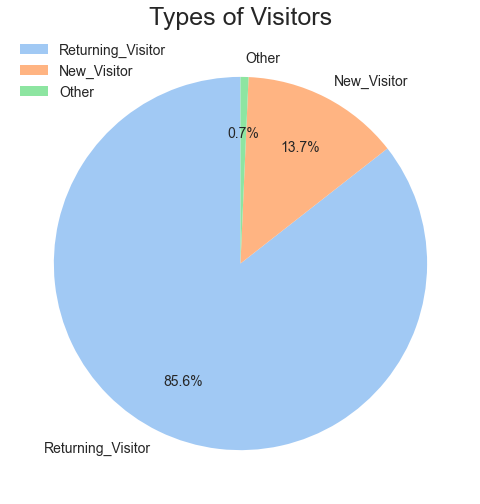

In [30]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel', len(data.VisitorType.unique()))

plt.pie(data=data,x = data.VisitorType.value_counts().values,labels = data.VisitorType.value_counts().index,
        autopct= lambda x: '{:.1f}%'.format(x),labeldistance=1.1,startangle=90,
        pctdistance=0.7,colors=colors)
plt.title('Types of Visitors',fontsize = 25)
plt.legend()
plt.show()

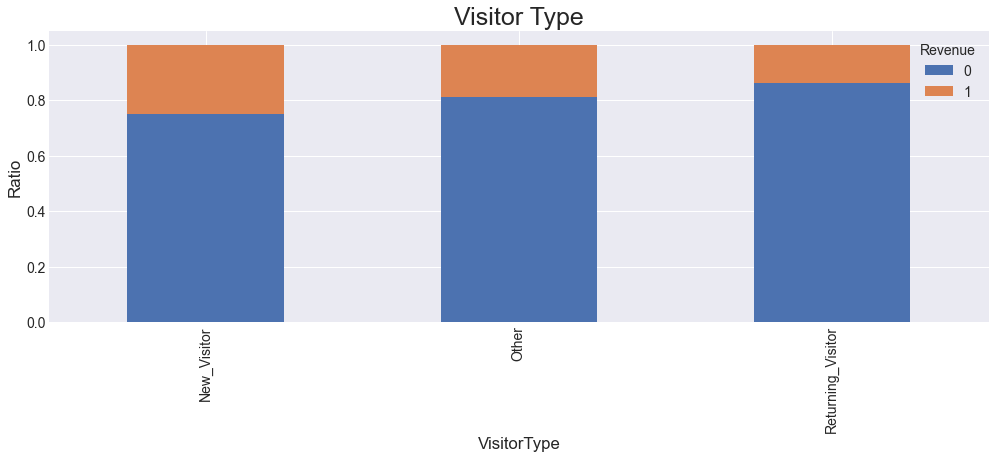

In [31]:
colors = sns.color_palette('deep', len(data.VisitorType.unique()))
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(axis=1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = colors)
plt.title('Visitor Type', fontsize = 25)
plt.ylabel('Ratio')
plt.show()

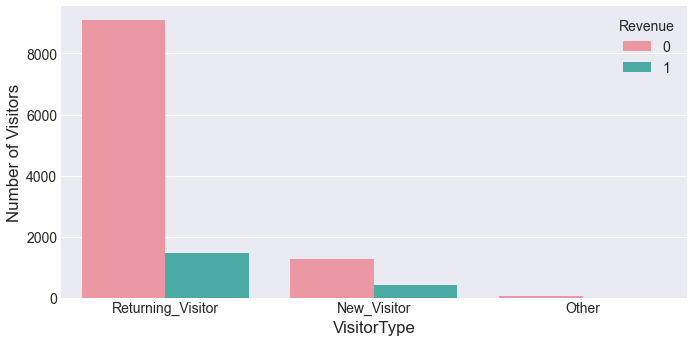

In [32]:
countplot('VisitorType')

In [33]:
print("Liklihood of purchasing for a New Customer",len(data[(data['VisitorType'] == 'Returning_Visitor') & (data['Revenue'] == 1)])/len(data[(data['VisitorType'] == 'Returning_Visitor') & (data['Revenue'] == 0)]))

Liklihood of purchasing for a New Customer 0.16187644532540468


In [34]:
print("Liklihood of purchasing for a New Customer",len(data[(data['VisitorType'] == 'New_Visitor') & (data['Revenue'] == 1)])/len(data[(data['VisitorType'] == 'New_Visitor') & (data['Revenue'] == 0)]))

Liklihood of purchasing for a New Customer 0.33176100628930816


***Observation:***
- It is clear from looking at the graph that more revenue is generated by Returning Visitors. Such high number of Returning Visitors also indicate that Website has build a strong Loyalty.
- But an interesting point to note is about Intent. The ***New_visitors*** visiting have more than ***double*** likelihood of purchasing. We can say that New visitors come with an intent of purchase and thus have more likelihood of generating revenue for Client.

***Suggestions:***
- Our client has a strong loyalty base but the growth of any company depends upon how it captures new customers in market. So our client should increase their reach to more consumers. They should focus their marketing budget to capture more new consumers by providing them lucarative offers.


***Referral Programs:*** Implement referral programs that incentivize existing customers to refer new customers. Offer rewards or discounts to customers who refer others, creating a win-win situation where existing customers are motivated to share their positive experiences and new customers are encouraged to try your products or services.

***Strategic Partnerships:*** Form partnerships with complementary businesses or influencers in your industry. Collaborate on joint marketing efforts, cross-promotions, or co-branded campaigns to tap into each other's customer bases and reach new audiences.
.

***Offer Incentives and Discounts:*** Provide incentives or special offers for new customers to encourage them to try your products or services. Consider offering discounts, free trials, or exclusive introductory packages to attract new customers and showcase the value of your offerings.

***Customer Reviews and Testimonials:*** Encourage satisfied customers to leave reviews and testimonials on review platforms, social media, or your website. Positive reviews can build trust and credibility, helping to attract new customers who are researching your business.

In [36]:
OS_val_counts = list(data.OperatingSystems.value_counts()[:3]) + [sum(data.OperatingSystems.value_counts()[3:])]

### Users Operating System Analysis 

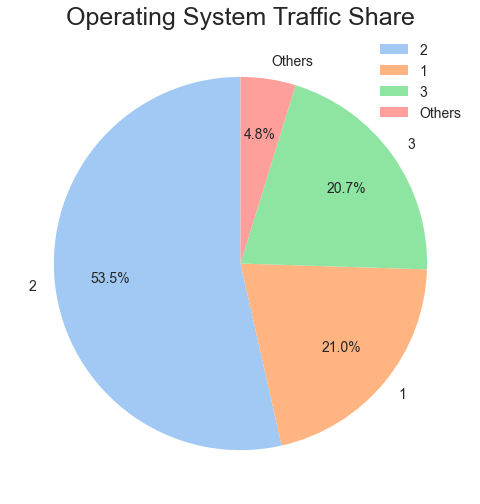

In [37]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel', len(data.OperatingSystems.unique()))
labels = "2", "1", "3", "Others"

plt.pie(data=data,x=OS_val_counts,labels=labels,
        autopct= lambda x: '{:.1f}%'.format(x),labeldistance=1.1,startangle=90,
        pctdistance=0.7,colors=colors)
plt.title('Operating System Traffic Share',fontsize = 25)
plt.legend()
plt.show()

***Observation:***
- We can see in the graph that only 3 Operating Systems are driving majority of visitors traffic. Infact ***54%*** of Vistors uses Browser ***"2"***.
- ***96 %*** of visitors are using operating Systmes ***"2", "1" and "3"***

***Suggestions:***

 Our client can leverage this information for improving User Experience.

This can be done by using following Strategies:
- ***User Experience:*** Understanding the primary operating system used by visitors allows the company to tailor the user experience to that specific OS. They can optimize the ***design, navigation, and functionality*** of their digital properties to provide a seamless and ***user-friendly experience*** for users of that operating system.
- ***Mobile Optimization:*** If the dominant operating system is a mobile platform, such as iOS or Android, the company should pay attention to mobile optimization. Ensuring that the website and other digital assets are responsive and mobile friendly is crucial for providing a smooth experience to users on mobile devices.
- ***App Development:*** If the company has a mobile app or is considering developing one, identifying the dominant operating system can influence the decision-making process. The company can prioritize developing or improving the app for the dominant operating system to reach and engage a larger user base.

### Browser Traffic Share Analysis

In [38]:
browser_val_counts = list(data.Browser.value_counts()[:3]) + [sum(data.Browser.value_counts()[3:])]

In [39]:
data.Browser.value_counts()[:3]

2    7961
1    2462
4     736
Name: Browser, dtype: int64

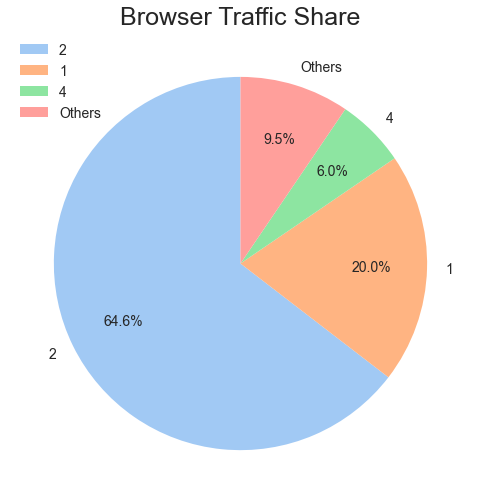

In [40]:
plt.figure(figsize=(8,8))
labels = ["2","1","4",'Others']
colors = sns.color_palette('pastel', len(data.Browser.unique()))
plt.pie(data=data,x = browser_val_counts ,labels=labels,
        autopct= lambda x: '{:.1f}%'.format(x),labeldistance=1.1,startangle=90,
        pctdistance=0.7,colors=colors)
plt.title('Browser Traffic Share',fontsize = 25)
plt.legend()
plt.show()

***Observation:***
- We can see in the graph that only 2 Browsers are driving majority of visitors traffic. Infact ***65%*** of Vistors uses Browser ***"2"***.
- ***85%*** of visitors are using Browser ***"2" and "1"***.

***Suggestions:***
- Our client can leverage this information to improve User Experience and its digital presence in market.

This can be done by using following Strategies:
- ***Browser Compatibility*** - With knowledge of the most used Browsers - the company can prioritize, ensuring that its website is fully compatible and optimized for those specific browsers.
- ***User Experience Improvement***: Understanding the primary browser used by visitors allows the company to focus on enhancing the user experience for that specific browser. They can tailor the website's design and features to provide a seamless and optimized experience for users of that browser.
- ***Targeted Advertising:***: The company can adjust its digital marketing strategies to target users of the dominant browser. This may involve creating browser-specific ads or optimizing landing pages to align with the preferences and behaviors of visitors using that browser.

### Monthly Analysis 

In [41]:
months = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug','Sep', 'Oct','Nov','Dec']

In [42]:
month_vistor_rate = (data['Month'].value_counts())[months]
month_visitor_1_rated = (data['Month'][data['Revenue']==1].value_counts())[months]
month_visitor_0_rated = (data['Month'][data['Revenue']==0].value_counts())[months]

In [43]:
palette = sns.color_palette('muted')

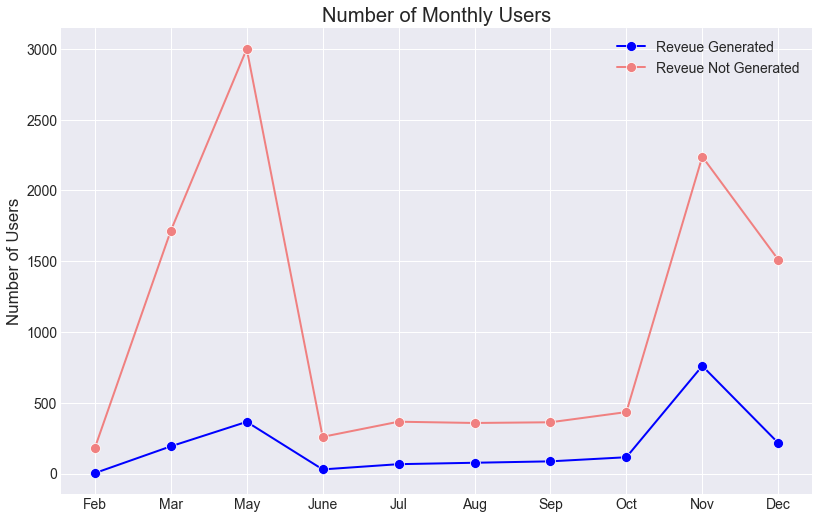

In [44]:
plt.figure(figsize=(12,8))
sns.lineplot(x=month_visitor_1_rated.index,y=month_visitor_1_rated.values,marker='o',palette='viridis',color='blue',markersize=10,linewidth=2,label='Reveue Generated')
sns.lineplot(x=month_visitor_0_rated.index,y=month_visitor_0_rated.values,marker='o',palette='muted',markersize=10,linewidth=2,label = 'Reveue Not Generated')
plt.title("Number of Monthly Users")
plt.ylabel("Number of Users")
plt.show()

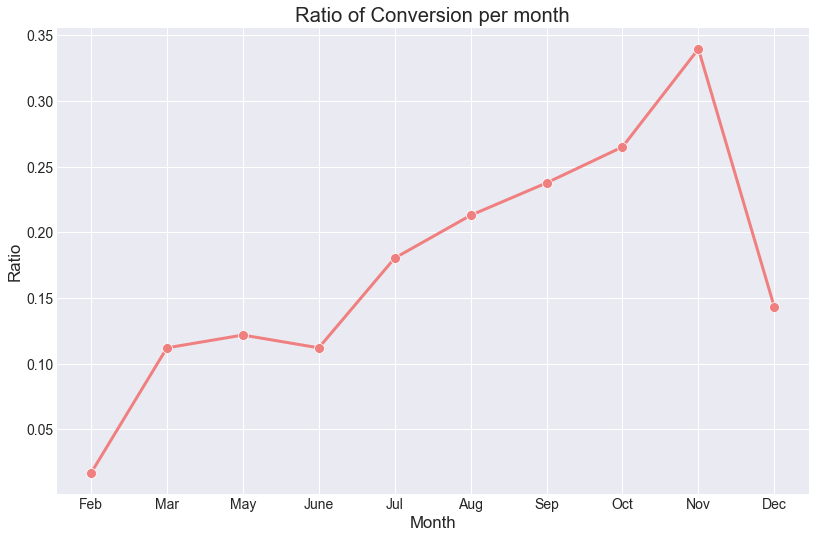

In [45]:
plt.figure(figsize=(12,8))

sns.lineplot(x=month_visitor_1_rated.index,y=month_visitor_1_rated.values/month_visitor_0_rated.values,marker='o',palette='viridis',markersize=10,linewidth=3)
plt.ylabel('Ratio')
plt.xlabel('Month')
plt.title('Ratio of Conversion per month')
plt.show()

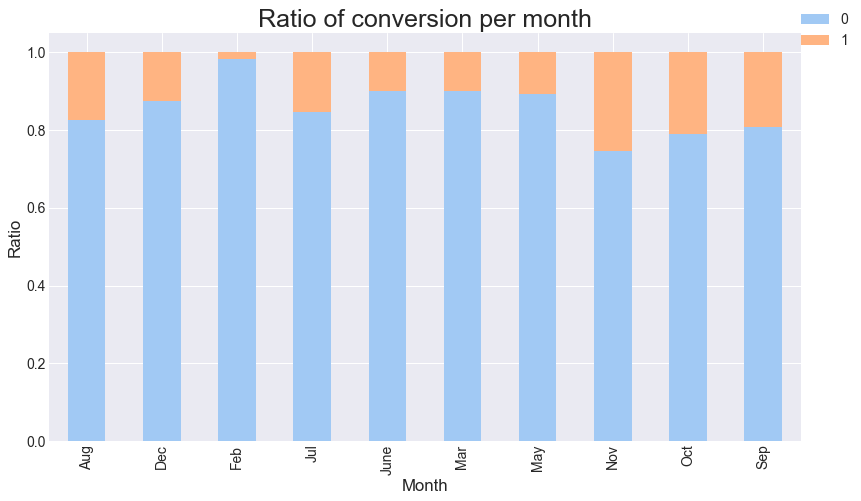

In [46]:
df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(axis=1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12,7), color = colors)
plt.title('Ratio of conversion per month', fontsize = 25)
plt.legend(loc='upper right', bbox_to_anchor=(1.08, 1.08))
plt.ylabel('Ratio')
plt.show()

The graph is plotted using ratio of number of vistors who generated revenue to number of vistors who just visited the webisite and did not generate revenue per month basis.

***Observation:***
- The visitors are highest in month of May followed by November. These are also the months during which most revenue is generated. All the other months revenue generation is more or less constant.
- It is interesting to note that even though in month of May most users are visiting the website but most conversions from visitors to buyers occur in the month of November.
- One of reason for this can ***Holiday Shopping Season*** for Christmas and New year celebration, which are long holidays session in western countries.
- Another reason is ***Black Friday Sales*** which leads to many consumers purchasing items due heavy discounts. 

- Reason for Month of ***May*** being heavy crowd puller can be:
    - Beginning of ***Spring season*** which leads consumer to adapt their lifestyle as per new season.
    - Many people go out on ***Vacation*** during this mentioned.
- But as mentioned earlier, most visitors are merely visiting website during month of May but bot really buying. This can also suggest gap between visitor interest and actual purchase behavior.

***Suggestions:***
- Our client can has a chance to convert the huge traffic visiting website in month of May. They are not able to captilize on it. As one can observe from the ratio of Conversion. 

This can be done by using following Strategies:
- ***Offer Incentives and Promotions*** : Provide incentives and promotions to encourage visitors to make a purchase. Consumer may be price sensitive considering higher revenue generated observed during month of November(sales season) Client can offer discounts, limited-time offers, free shipping, or exclusive deals to entice users and increase conversion rates. The month of May is beginning of summer, the client can offer products which are expected during this time.
- ***Retargeting and Remarketing***: Implement retargeting and remarketing strategies to reengage visitors who showed initial interest but did not convert. Use email campaigns, or personalized recommendations to remind them of their previous interactions and offer incentives to encourage them to return and complete their purchase.
- ***Improving Website Performance:*** It may happen that website is not able to handle such heavy traffic. Slow page load times and technical issues can deter users from completing their purchases. Website's performance should be optimized to ensure fast loading speeds and seamless navigation. Regular testing and monitoring should be conducted to identify and fix any technical issues that may impact the user experience.

In [47]:
data['VisitorType'][data['Revenue']==1].value_counts()

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: VisitorType, dtype: int64

In [48]:
data['VisitorType'][data['Revenue']==0].value_counts()

Returning_Visitor    9081
New_Visitor          1272
Other                  69
Name: VisitorType, dtype: int64

    Above info not used

### Traffic Source Analysis

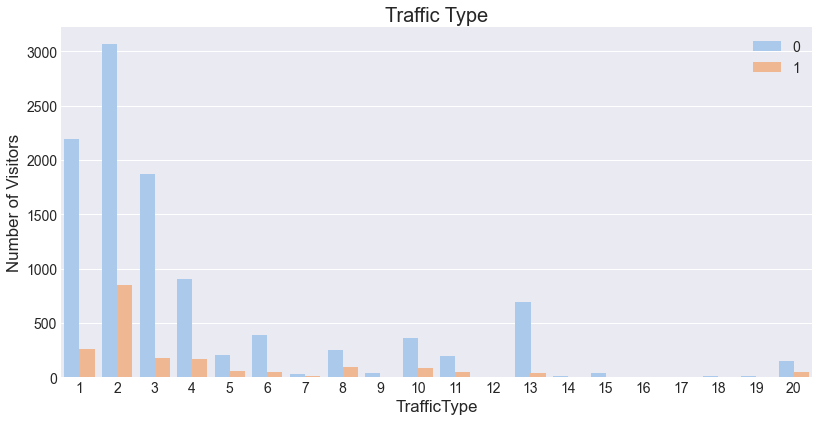

In [172]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='TrafficType',hue='Revenue',palette=palette)
plt.title('Traffic Type',fontsize = 20)
plt.ylabel('Number of Visitors')
plt.legend()
plt.show()

***Observation:***
- Traffic Source "2" has most number of Visitors followed by Source "1" and "3".
- But lets check the picture considering the ratio of conversion.

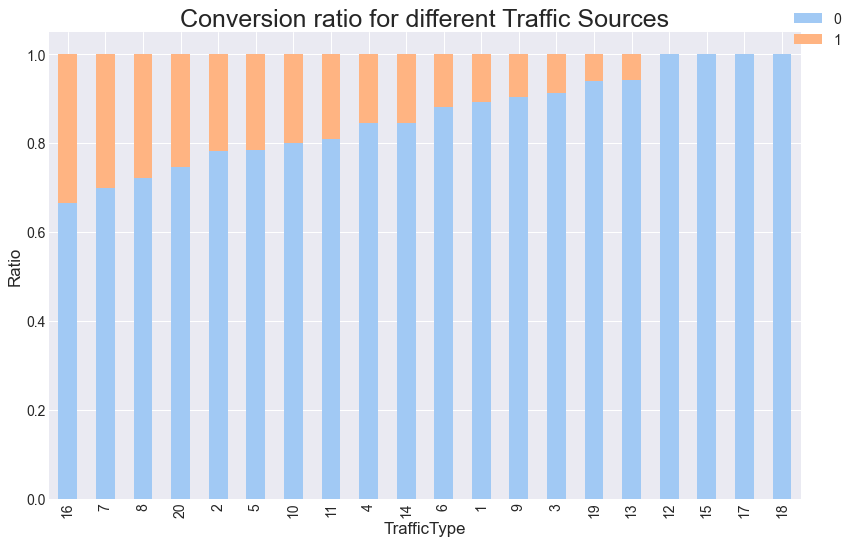

In [168]:
df = pd.crosstab(data['TrafficType'], data['Revenue'])
(df.div(df.sum(axis=1).astype(float), axis = 0)).sort_values(1,ascending=False).plot(kind = 'bar', stacked = True, figsize = (12,8), color = colors)
plt.title('Conversion ratio for different Traffic Sources', fontsize = 25)
plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1.07))
plt.ylabel('Ratio')
plt.show()

***Observation:***
- It is clear that even though most traffic(68%) is visiting due to Source "2", "1" and "3" but ratio of conversion of source "1" and "3" is below average.
- But that does not mean that Client can rely on source "16" because the total number of  visitor counts is terribly low here. 
- But we can infer from above two graphs that our Best Source to drive and convert Traffic is still Source "2" followed by "1" , 3", "8" and "10". For this feature just considering the conversion will not do, since as number of visitors increase conversion rate will decrease.

***Suggestions:***
- Develop Source "8" and "10". Check its conversion rate with increase in visitors. 
- ***Personalize product recommendations***: We can use data on users past purchases or browsing behavior to personalize product recommendations for source "2", "1" and 3". By suggesting relevant products or services based on their preferences, client can increase the chances of generating revenue from these three sources which drive around 68% of traffic.
- ***Analyze and optimize:*** Monitor the performance of these Sources, tracking key metrics such as open rates, click-through rates, and conversion rates. Analyze the data to identify areas of improvement and make optimizations to increase revenue generation.
- ***Develop potential Sources:*** like "8" and "10". Since they have potential because of high conversion rate. Though performance of these sources and the key metrcis needs to be tracked.

### Region Analysis

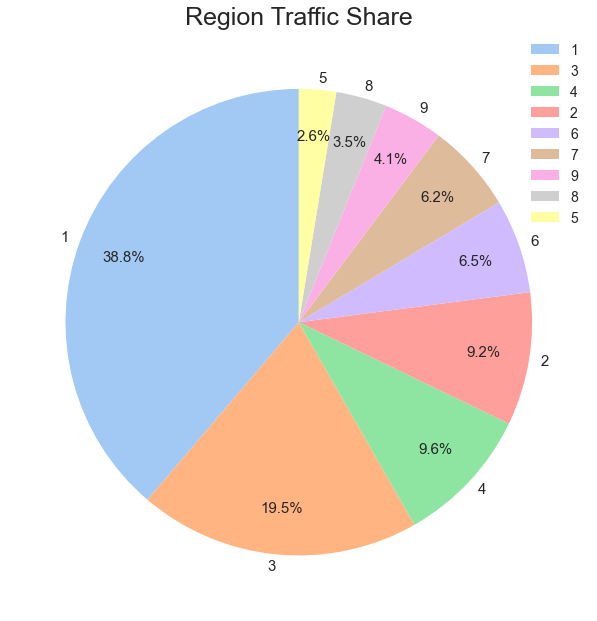

In [183]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel', len(data.Region.unique()))
plt.pie(data=data,x = data.Region.value_counts().values ,labels=data.Region.value_counts().index,
        autopct= lambda x: '{:.1f}%'.format(x),labeldistance=1.05,startangle=90,textprops={'fontsize': 15},
        pctdistance=0.8,colors=colors)
plt.title('Region Traffic Share',fontsize = 25)
plt.legend()
plt.show()

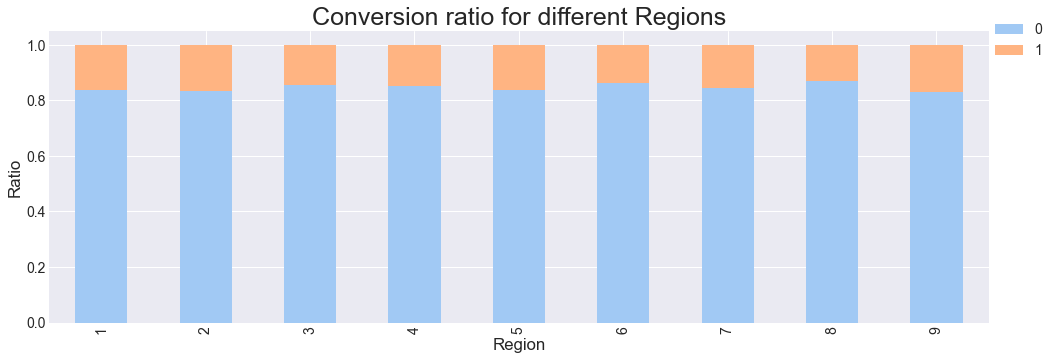

In [184]:
df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(axis=1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15,5), color = colors)
plt.title('Conversion ratio for different Regions', fontsize = 25)
plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1.07))
plt.ylabel('Ratio')
plt.show()

***Observation:***
- Almost 60% of Users are from Region 1 and 3. With Region 1 Users occupying the biggest chunk of pie with almost 40%.
- Even though there is disproprtionate share of Users from different region it is not affecting the conversion rate. Each region has a similar conversion rate.
- It will be interesting to look into average income of users from different region. My hypothesis is average income is similar. Since population number is the only driving factor for higher share.

##### Special day and Revenue generation

In [52]:
palette = sns.color_palette('pastel')

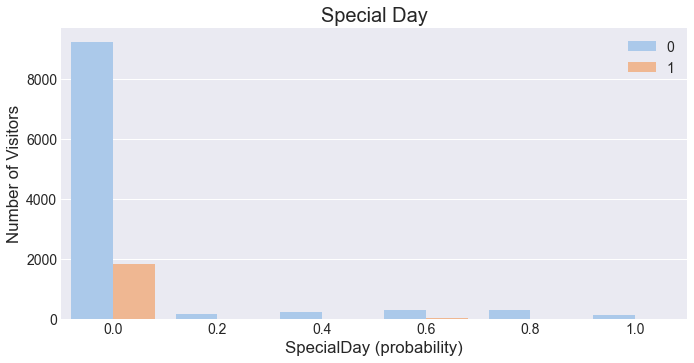

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='SpecialDay (probability)',hue='Revenue',palette=palette)
plt.title('Special Day',fontsize = 20)
plt.ylabel('Number of Visitors')
plt.legend()

plt.show()

Special Day paramter indicates closeness of the browsing date to special days or holidays.

***Observation:***
It is clear that user purchase more items when Special days are closer.

***Suggestion:***
- Create ***holiday-themed content***: Client can develop engaging and shareable content that is relevant to the special day. This can include blog posts, videos, infographics, or social media content that educates, entertains, or adds value to the users experience during the occasion.
- ***Design the wesbite with special day theme***: Design website with a special day-themed elements. This creates a festive atmosphere and enhances the customer experience, making them more likely to engage with your brand and make purchases.
- ***Collaborate with influencers***: Partner with influencers or brand ambassadors who have a strong presence or influence during the special day or holiday. They can promote products or services to their followers, leveraging their credibility and reach to drive engagement and sales.

### Target Variable - Revenue Generated or Not

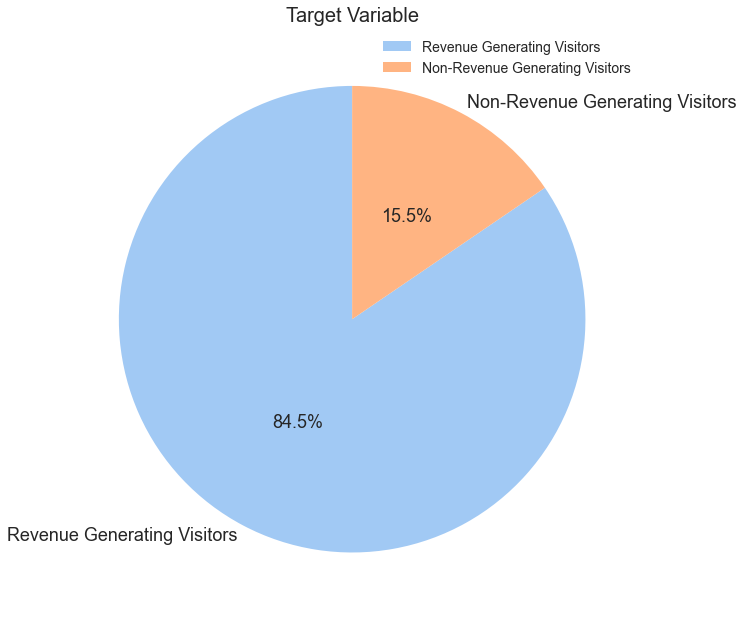

In [54]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel', len(data.Revenue.unique()))
plt.pie(data=data,x = data.Revenue.value_counts().values ,labels=['Revenue Generating Visitors',"Non-Revenue Generating Visitors"],
        autopct= lambda x: '{:.1f}%'.format(x),labeldistance=1.05,startangle=90,textprops={'fontsize': 18},
        pctdistance=0.5,colors=colors)
plt.title('Target Variable',fontsize = 20)
plt.legend()
plt.show()

***Observation:***
- Only about 15.5% of website visitors are generating revenue.
- Data is imbalanced. Balacning needs to be done.

### Analysis of Numerical Features

To be continued